In [21]:
import numpy as np
import pandas as pd
from scipy.special import expit 
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "8" 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from scipy.special import softmax
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt



from scipy.special import expit
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    r2_score,
    roc_auc_score
)


In [22]:
df = pd.read_csv(r"MergedData.csv")
print("Shape:", df.shape)
df = df.drop(columns=["Unnamed: 0"])
df.head()

Shape: (11000, 285)


Rating  Binary Rating  Current Ratio  Long-term Debt / Capital  \
0       A              1         1.1507                    0.4551   
1  AAA-AA              1         1.1129                    0.0072   
2     BBB              1         1.9276                    0.2924   
3  AAA-AA              1         0.8358                    0.4708   
4       A              1         1.2931                    0.2644   

   Debt/Equity Ratio  Gross Margin  Operating Margin  EBIT Margin  \
0             0.8847       77.6230           19.4839      19.4839   
1             0.0073       43.6619           19.8327      19.8327   
2             0.4255       11.9008            3.3173       3.3173   
3             0.9491       64.5096           18.4549      18.4549   
4             0.4036        3.8385            1.3269       1.3269   

   EBITDA Margin  Pre-Tax Profit Margin  Net Profit Margin  Asset Turnover  \
0        28.9834                13.6093             8.3224          0.3173   
1        23.9379                20.8699            13.5690          0.3324   
2         3.6338                 3.0536             2.1418          2.4620   
3        27.9377                15.1135             9.0246          0.2946   
4         1.5847                 1.2304             0.6518          4.9276   

   ROE - Return On Equity  Return On Tangible Equity  ROA - Return On Assets  \
0                  8.1724                     8.1978                  2.6385   
1                 22.0354                    47.2858                  4.4944   
2                 13.6376                    16.7991                  5.2731   
3                  9.6412                     9.7015                  2.6583   
4                 11.1256                    19.4184                  2.9364   

   ROI - Return On Investment  Operating Cash Flow Per Share  \
0                      4.4530                         1.9957   
1                     21.8765                         0.2501   
2                      9.6494                        -7.6079   
3                      5.1018                         1.7438   
4                      8.1844                         1.9725   

   Free Cash Flow Per Share  SIC Code_100  SIC Code_1000  SIC Code_1040  \
0                   -0.1333             0              0              0   
1                    0.3132             0              0              0   
2                   -7.3231             0              0              0   
3                   -0.8999             0              0              0   
4                    2.4174             0              0              0   

   SIC Code_1090  SIC Code_1220  SIC Code_1311  SIC Code_1381  SIC Code_1389  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   SIC Code_1400  SIC Code_1531  SIC Code_1540  SIC Code_1600  SIC Code_1623  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   SIC Code_1731  SIC Code_2000  SIC Code_2011  SIC Code_2015  SIC Code_2030  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0         

In [23]:
# df = df.drop(columns=["Unnamed: 0"])
# df.isna().sum()

In [24]:
pd.set_option('display.max_columns', None)

unique_counts = df.nunique().sort_values(ascending=False)
print("Number of Unique Values per Column")
print(unique_counts)

Number of Unique Values per Column
ROE - Return On Equity                              5846
ROI - Return On Investment                          5836
ROA - Return On Assets                              5827
EBITDA Margin                                       2649
Pre-Tax Profit Margin                               2649
                                                    ... 
SIC Code_3570                                          2
SIC Code_3571                                          2
SIC Code_3572                                          2
SIC Code_3576                                          2
Rating Agency_Standard & Poor's Ratings Services       2
Length: 284, dtype: int64


In [25]:
unique_counts_df = unique_counts.reset_index()
unique_counts_df.columns = ['Column', 'Unique_Values']
print(unique_counts_df)
unique_counts_df.to_csv("features.csv")

                                               Column  Unique_Values
0                              ROE - Return On Equity           5846
1                          ROI - Return On Investment           5836
2                              ROA - Return On Assets           5827
3                                       EBITDA Margin           2649
4                               Pre-Tax Profit Margin           2649
..                                                ...            ...
279                                     SIC Code_3570              2
280                                     SIC Code_3571              2
281                                     SIC Code_3572              2
282                                     SIC Code_3576              2
283  Rating Agency_Standard & Poor's Ratings Services              2

[284 rows x 2 columns]


In [26]:
df["Rating"].unique()

array(['A', 'AAA-AA', 'BBB', 'BB', 'B and Below'], dtype=object)

In [27]:
# --- Step 1: Prepare Data ---
X = df.drop(columns=["Rating", "Binary Rating"])
y_br = df["Binary Rating"].astype(int)
y_rating = df["Rating"]

# Encode multi-class target
le = LabelEncoder()
y_r = le.fit_transform(y_rating)
n_classes = len(le.classes_)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])


X_train, X_test, y_br_train, y_br_test, y_r_train, y_r_test = train_test_split(
    X_scaled, y_br, y_r, test_size=0.2, random_state=42
)

print(X_train.shape, y_r_train.shape)
y_test = y_br_test
y_train = y_br_train


(8800, 283) (8800,)


In [28]:
# defining Log Posterior Function
def log_posterior(beta, X, y):
    """
    Compute log posterior = log likelihood + log prior
    Using weak Gaussian prior on beta (N(0, 10))
    """
    linear_pred = X @ beta
    p = expit(linear_pred)
    log_likelihood = np.sum(y * np.log(p + 1e-10) + (1 - y) * np.log(1 - p + 1e-10))
    log_prior = -0.5 * np.sum(beta**2 / 10)
    return log_likelihood + log_prior

In [29]:
# defining Metropolis Sampling
def metropolis(X, y, n_iters=5000, proposal_std=0.05):
    n_features = X.shape[1]
    beta = np.zeros(n_features)  # Initial guess
    samples = []
    accepted = 0

    current_log_post = log_posterior(beta, X, y)

    for i in range(n_iters):
        # Propose new beta
        beta_new = beta + np.random.normal(0, proposal_std, size=n_features)
        new_log_post = log_posterior(beta_new, X, y)
        
        # Acceptance probability
        acceptance_prob = np.exp(new_log_post - current_log_post)
        
        if np.random.rand() < acceptance_prob:
            beta = beta_new
            current_log_post = new_log_post
            accepted += 1
        
        samples.append(beta)
    
    samples = np.array(samples)
    acceptance_rate = accepted / n_iters
    print(f"Acceptance Rate: {acceptance_rate:.3f}")
    return samples

In [30]:
# RUN SAMPLER
samples = metropolis(X_train, y_train, n_iters=30000, proposal_std=0.02)

burn_in = 2000
posterior_samples = samples[burn_in:]
beta_mean = posterior_samples.mean(axis=0)

print("Posterior mean shape:", beta_mean.shape)

Acceptance Rate: 0.005
Posterior mean shape: (283,)


β mean: 283, β samples: 283, features: 283


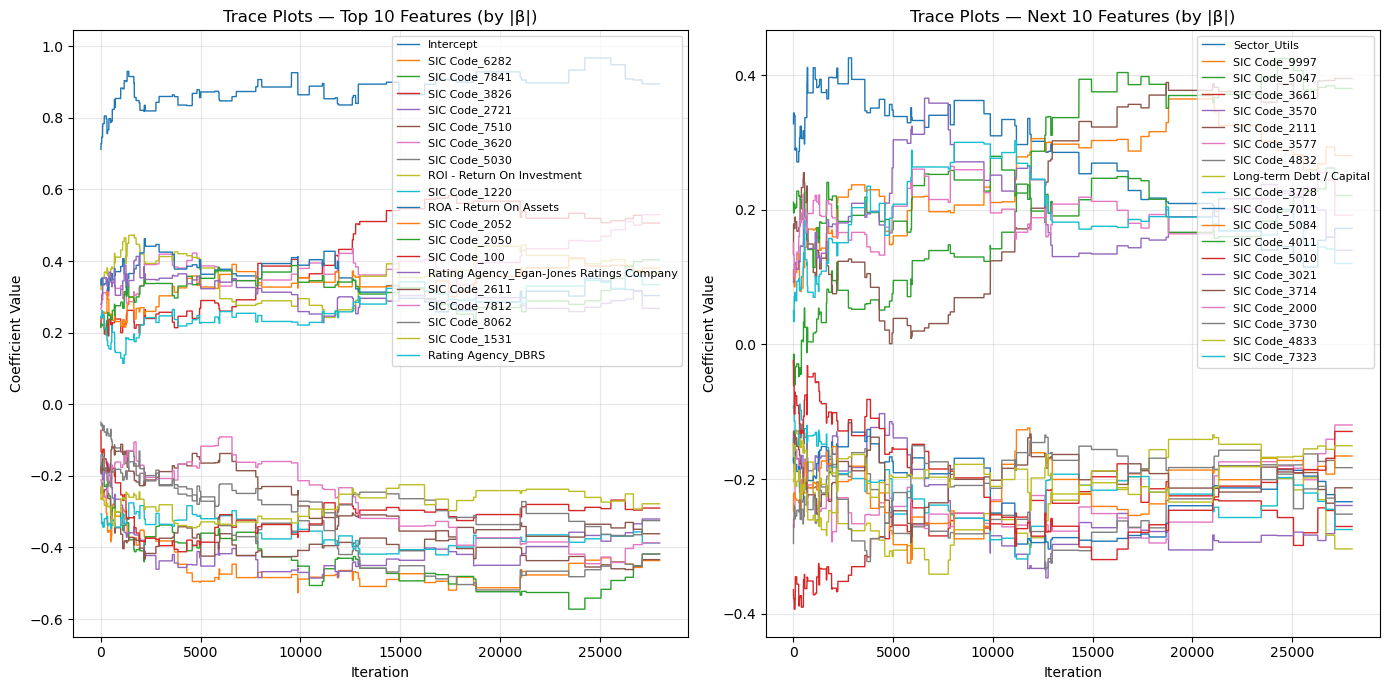

In [31]:
feature_names = ["Intercept"] + list(df.drop(columns=["Rating", "Binary Rating"]).columns)

# Confirm alignment (should all match in length)
print(f"β mean: {len(beta_mean)}, β samples: {samples.shape[1]}, features: {len(feature_names)}")

# top 20 most influential features
abs_beta = np.abs(beta_mean)
top20_indices = np.argsort(abs_beta)[-40:][::-1]
top20_features = [feature_names[i] for i in top20_indices]

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Split into 10 + 10
first10 = top20_indices[:20]
second10 = top20_indices[20:]

# --- LEFT PANEL: First 10 ---
for idx in first10:
    axes[0].plot(samples[burn_in:, idx], label=feature_names[idx], linewidth=1)
axes[0].set_title("Trace Plots — Top 10 Features (by |β|)")
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("Coefficient Value")
axes[0].legend(fontsize=8, loc="upper right")
axes[0].grid(alpha=0.3)

# --- RIGHT PANEL: Next 10 ---
for idx in second10:
    axes[1].plot(samples[burn_in:, idx], label=feature_names[idx], linewidth=1)
axes[1].set_title("Trace Plots — Next 10 Features (by |β|)")
axes[1].set_xlabel("Iteration")
axes[1].set_ylabel("Coefficient Value")
axes[1].legend(fontsize=8, loc="upper right")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

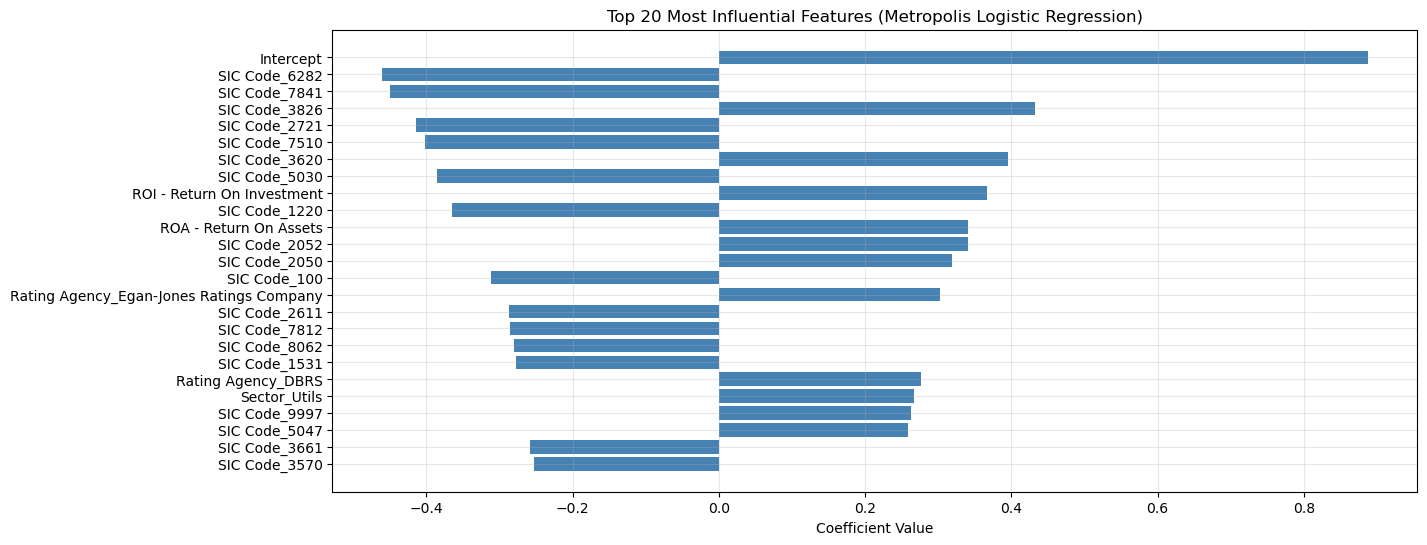

In [32]:
beta_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": beta_mean
})

# Sort by absolute importance
beta_df["AbsCoefficient"] = beta_df["Coefficient"].abs()
top20 = beta_df.sort_values("AbsCoefficient", ascending=False).head(25)

# Plot
plt.figure(figsize=(14, 6))
plt.barh(top20["Feature"], top20["Coefficient"], color='steelblue')
plt.xlabel("Coefficient Value")
plt.title("Top 20 Most Influential Features (Metropolis Logistic Regression)")
plt.gca().invert_yaxis()  # Largest on top
plt.grid(alpha=0.3)
plt.show()

In [33]:
# Convert y_train to numpy for reshape
y_br_train = np.asarray(y_train).reshape(-1, 1)


# 1. Posterior predictive on TRAIN (n_train, n_post)
posterior_preds_train = expit(X_train @ posterior_samples.T)
raw_preds_train = posterior_preds_train.mean(axis=1)

print("Posterior predictive (train):", posterior_preds_train.shape)

# 2. Train residuals (n_train, n_post)
residual_matrix_train = y_br_train - posterior_preds_train
print("Train residual matrix:", residual_matrix_train.shape)


Posterior predictive (train): (8800, 28000)
Train residual matrix: (8800, 28000)


In [ ]:
# Flatten train residuals
all_train_residuals = residual_matrix_train.flatten().reshape(-1, 1)

gmm = GaussianMixture(
    n_components=3,
    covariance_type="full",
    random_state=42
)
gmm.fit(all_train_residuals)

means = gmm.means_.flatten()
weights = gmm.weights_
print("Train residual GMM means:", means)
print("Train GMM weights:", weights)
# 58m 14s for merged dataset
# 17m 54s for Actual dataset

Train residual GMM means: [ 0.42700484 -0.57590261  0.09466053]
Train GMM weights: [0.20913032 0.24703189 0.54383779]


In [35]:
# 3. Posterior predictive on TEST
y_br_test = np.asarray(y_test).reshape(-1, 1)

posterior_preds_test = expit(X_test @ posterior_samples.T)
raw_preds_test = posterior_preds_test.mean(axis=1)

print("Posterior predictive (test):", posterior_preds_test.shape)
 
# 4. Test residuals
residual_matrix_test = y_br_test - posterior_preds_test
print("Test residual matrix:", residual_matrix_test.shape)

Posterior predictive (test): (2200, 28000)
Test residual matrix: (2200, 28000)


In [36]:
# Test responsibilities (n_test, K_clusters)
posterior_resp_test = np.zeros((len(y_br_test), len(means)))

for i in range(len(y_br_test)):
    rvec = residual_matrix_test[i].reshape(-1, 1)
    posterior_resp_test[i] = gmm.predict_proba(rvec).mean(axis=0)


In [37]:
# Weighted penalty
penalty_test = (posterior_resp_test * np.abs(means)).sum(axis=1)

# Normalize penalty
penalty_test = penalty_test / penalty_test.max()
penalty_test = penalty_test * 0.25

# Refined predictions
refined_preds_test = raw_preds_test - penalty_test
refined_preds_test = np.clip(refined_preds_test, 0, 1)


In [38]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("\n---- TEST RAW ----")
raw_pred_labels = (raw_preds_test > 0.5).astype(int)
print("AUC:", roc_auc_score(y_br_test, raw_preds_test))
print("Accuracy:", accuracy_score(y_br_test, raw_pred_labels))
print("Precision:", precision_score(y_br_test, raw_pred_labels))
print("Recall:", recall_score(y_br_test, raw_pred_labels))
print("F1 Score:", f1_score(y_br_test, raw_pred_labels))

print("\n---- TEST REFINED ----")
refined_pred_labels = (refined_preds_test > 0.5).astype(int)
print("AUC:", roc_auc_score(y_br_test, refined_preds_test))
print("Accuracy:", accuracy_score(y_br_test, refined_pred_labels))
print("Precision:", precision_score(y_br_test, refined_pred_labels))
print("Recall:", recall_score(y_br_test, refined_pred_labels))
print("F1 Score:", f1_score(y_br_test, refined_pred_labels))



---- TEST RAW ----
AUC: 0.8079775048580284
Accuracy: 0.7731818181818182
Precision: 0.789086450030656
Recall: 0.8925104022191401
F1 Score: 0.837617962902701

---- TEST REFINED ----
AUC: 0.8847764392023685
Accuracy: 0.8077272727272727
Precision: 0.897116134060795
Recall: 0.7981969486823856
F1 Score: 0.8447706422018348


In [39]:
comparison = pd.DataFrame({
    "y": y_br_test.flatten(),
    "raw_prob": raw_preds_test,
    "raw_pred": (raw_preds_test > 0.5).astype(int),
    "refined_prob": refined_preds_test,
    "refined_pred": (refined_preds_test > 0.5).astype(int),
    "penalty": penalty_test,
    "shift": refined_preds_test - raw_preds_test
})


# 95% Credible Intervals for each test sample
lower_ci = np.percentile(posterior_preds_test, 2.5, axis=1)
upper_ci = np.percentile(posterior_preds_test, 97.5, axis=1)

comparison["CI_lower_95"] = lower_ci
comparison["CI_upper_95"] = upper_ci
display(comparison.head(20))

y  raw_prob  raw_pred  refined_prob  refined_pred   penalty     shift  \
0   0  0.531617         1      0.281673             0  0.249944 -0.249944   
1   0  0.477467         0      0.235827             0  0.241640 -0.241640   
2   1  0.484733         0      0.309423             0  0.175309 -0.175309   
3   1  0.984014         1      0.932968             1  0.051045 -0.051045   
4   0  0.434980         0      0.213740             0  0.221240 -0.221240   
5   1  0.975563         1      0.924681             1  0.050882 -0.050882   
6   1  0.734932         1      0.636304             1  0.098628 -0.098628   
7   1  0.706527         1      0.608045             1  0.098482 -0.098482   
8   1  0.755075         1      0.675630             1  0.079445 -0.079445   
9   1  0.959759         1      0.908511             1  0.051247 -0.051247   
10  1  0.996894         1      0.945634             1  0.051259 -0.051259   
11  1  0.586727         1      0.439638             0  0.147090 -0.147090   
12  0  0.634732         1      0.384738             0  0.249994 -0.249994   
13  0  0.290384         0      0.151943             0  0.138440 -0.138440   
14  1  0.928920         1      0.877409             1  0.051511 -0.051511   
15  1  0.908054         1      0.855522             1  0.052532 -0.052532   
16  1  0.932417         1      0.881116             1  0.051301 -0.051301   
17  1  0.597557         1      0.461062             0  0.136496 -0.136496   
18  0  0.114784         0      0.021691             0  0.093093 -0.093093   
19  1  0.593787         1      0.454129             0  0.139658 -0.139658   

    CI_lower_95  CI_upper_95  
0      0.421123     0.638802  
1      0.245612     0.775104  
2      0.340298     0.640329  
3      0.932137     0.997161  
4      0.132503     0.954201  
5      0.951688     0.990845  
6      0.547395     0.918675  
7      0.618534     0.805813  
8      0.632443     0.866314  
9      0.880864     0.990092  
10     0.987095     0.999821  
11     0.407935     0.781793  
12     0.529178     0.770723  
13     0.032578     0.884824  
14     0.881461     0.958472  
15     0.829973     0.943322  
16     0.895898     0.952259  
17     0.359209     0.897611  
18     0.033883     0.295739  
19     0.340357     0.955931

## Synthetic Data

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>y</th>
      <th>raw_prob</th>
      <th>raw_pred</th>
      <th>refined_prob</th>
      <th>refined_pred</th>
      <th>penalty</th>
      <th>shift</th>
      <th>CI_lower_95</th>
      <th>CI_upper_95</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>0.837957</td>
      <td>1</td>
      <td>0.739866</td>
      <td>1</td>
      <td>0.098091</td>
      <td>-0.098091</td>
      <td>0.711508</td>
      <td>0.920831</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>0.315486</td>
      <td>0</td>
      <td>0.160658</td>
      <td>0</td>
      <td>0.154829</td>
      <td>-0.154829</td>
      <td>0.003980</td>
      <td>0.960458</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0</td>
      <td>0.549304</td>
      <td>1</td>
      <td>0.319843</td>
      <td>0</td>
      <td>0.229461</td>
      <td>-0.229461</td>
      <td>0.030234</td>
      <td>0.976889</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0</td>
      <td>0.801307</td>
      <td>1</td>
      <td>0.551540</td>
      <td>1</td>
      <td>0.249768</td>
      <td>-0.249768</td>
      <td>0.267552</td>
      <td>0.978642</td>
    </tr>
    <tr>
      <th>4</th>
      <td>1</td>
      <td>0.705095</td>
      <td>1</td>
      <td>0.591756</td>
      <td>1</td>
      <td>0.113339</td>
      <td>-0.113339</td>
      <td>0.483331</td>
      <td>0.868924</td>
    </tr>
    <tr>
      <th>5</th>
      <td>1</td>
      <td>0.538163</td>
      <td>1</td>
      <td>0.396369</td>
      <td>0</td>
      <td>0.141794</td>
      <td>-0.141794</td>
      <td>0.312805</td>
      <td>0.774173</td>
    </tr>
    <tr>
      <th>6</th>
      <td>0</td>
      <td>0.629131</td>
      <td>1</td>
      <td>0.379131</td>
      <td>0</td>
      <td>0.250000</td>
      <td>-0.250000</td>
      <td>0.471882</td>
      <td>0.873571</td>
    </tr>
    <tr>
      <th>7</th>
      <td>1</td>
      <td>0.674249</td>
      <td>1</td>
      <td>0.556553</td>
      <td>1</td>
      <td>0.117696</td>
      <td>-0.117696</td>
      <td>0.546920</td>
      <td>0.851984</td>
    </tr>
    <tr>
      <th>8</th>
      <td>1</td>
      <td>0.463477</td>
      <td>0</td>
      <td>0.308178</td>
      <td>0</td>
      <td>0.155299</td>
      <td>-0.155299</td>
      <td>0.309383</td>
      <td>0.680585</td>
    </tr>
    <tr>
      <th>9</th>
      <td>0</td>
      <td>0.711958</td>
      <td>1</td>
      <td>0.461958</td>
      <td>0</td>
      <td>0.250000</td>
      <td>-0.250000</td>
      <td>0.622995</td>
      <td>0.809827</td>
    </tr>
    <tr>
      <th>10</th>
      <td>1</td>
      <td>0.669168</td>
      <td>1</td>
      <td>0.551466</td>
      <td>1</td>
      <td>0.117702</td>
      <td>-0.117702</td>
      <td>0.508392</td>
      <td>0.800873</td>
    </tr>
    <tr>
      <th>11</th>
      <td>0</td>
      <td>0.814990</td>
      <td>1</td>
      <td>0.564990</td>
      <td>1</td>
      <td>0.250000</td>
      <td>-0.250000</td>
      <td>0.548878</td>
      <td>0.928031</td>
    </tr>
    <tr>
      <th>12</th>
      <td>0</td>
      <td>0.462631</td>
      <td>0</td>
      <td>0.236252</td>
      <td>0</td>
      <td>0.226379</td>
      <td>-0.226379</td>
      <td>0.045691</td>
      <td>0.823884</td>
    </tr>
    <tr>
      <th>13</th>
      <td>1</td>
      <td>0.861891</td>
      <td>1</td>
      <td>0.756800</td>
      <td>1</td>
      <td>0.105091</td>
      <td>-0.105091</td>
      <td>0.430595</td>
      <td>0.988065</td>
    </tr>
    <tr>
      <th>14</th>
      <td>1</td>
      <td>0.940438</td>
      <td>1</td>
      <td>0.845900</td>
      <td>1</td>
      <td>0.094538</td>
      <td>-0.094538</td>
      <td>0.854289</td>
      <td>0.992882</td>
    </tr>
    <tr>
      <th>15</th>
      <td>1</td>
      <td>0.687916</td>
      <td>1</td>
      <td>0.567281</td>
      <td>1</td>
      <td>0.120634</td>
      <td>-0.120634</td>
      <td>0.431948</td>
      <td>0.884229</td>
    </tr>
    <tr>
      <th>16</th>
      <td>1</td>
      <td>0.487963</td>
      <td>0</td>
      <td>0.343806</td>
      <td>0</td>
      <td>0.144157</td>
      <td>-0.144157</td>
      <td>0.152346</td>
      <td>0.762283</td>
    </tr>
    <tr>
      <th>17</th>
      <td>1</td>
      <td>0.779192</td>
      <td>1</td>
      <td>0.671616</td>
      <td>1</td>
      <td>0.107576</td>
      <td>-0.107576</td>
      <td>0.385401</td>
      <td>0.985609</td>
    </tr>
    <tr>
      <th>18</th>
      <td>1</td>
      <td>0.592617</td>
      <td>1</td>
      <td>0.460291</td>
      <td>0</td>
      <td>0.132326</td>
      <td>-0.132326</td>
      <td>0.480701</td>
      <td>0.715808</td>
    </tr>
    <tr>
      <th>19</th>
      <td>0</td>
      <td>0.588965</td>
      <td>1</td>
      <td>0.338966</td>
      <td>0</td>
      <td>0.249999</td>
      <td>-0.249999</td>
      <td>0.442237</td>
      <td>0.776722</td>
    </tr>
  </tbody>
</table>
</div>


## RawData
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>y</th>
      <th>raw_prob</th>
      <th>raw_pred</th>
      <th>refined_prob</th>
      <th>refined_pred</th>
      <th>penalty</th>
      <th>shift</th>
      <th>CI_lower_95</th>
      <th>CI_upper_95</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>0.906897</td>
      <td>1</td>
      <td>0.856850</td>
      <td>1</td>
      <td>0.050047</td>
      <td>-0.050047</td>
      <td>0.870164</td>
      <td>0.936189</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0</td>
      <td>0.080274</td>
      <td>0</td>
      <td>0.029642</td>
      <td>0</td>
      <td>0.050632</td>
      <td>-0.050632</td>
      <td>0.032285</td>
      <td>0.143870</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1</td>
      <td>0.995710</td>
      <td>1</td>
      <td>0.990407</td>
      <td>1</td>
      <td>0.005303</td>
      <td>-0.005303</td>
      <td>0.984489</td>
      <td>0.999387</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0</td>
      <td>0.246583</td>
      <td>0</td>
      <td>0.173034</td>
      <td>0</td>
      <td>0.073548</td>
      <td>-0.073548</td>
      <td>0.100655</td>
      <td>0.399899</td>
    </tr>
    <tr>
      <th>4</th>
      <td>1</td>
      <td>0.905432</td>
      <td>1</td>
      <td>0.885501</td>
      <td>1</td>
      <td>0.019931</td>
      <td>-0.019931</td>
      <td>0.503968</td>
      <td>0.999999</td>
    </tr>
    <tr>
      <th>5</th>
      <td>1</td>
      <td>0.958029</td>
      <td>1</td>
      <td>0.916477</td>
      <td>1</td>
      <td>0.041552</td>
      <td>-0.041552</td>
      <td>0.896066</td>
      <td>0.987154</td>
    </tr>
    <tr>
      <th>6</th>
      <td>0</td>
      <td>0.437922</td>
      <td>0</td>
      <td>0.279245</td>
      <td>0</td>
      <td>0.158677</td>
      <td>-0.158677</td>
      <td>0.282119</td>
      <td>0.632481</td>
    </tr>
    <tr>
      <th>7</th>
      <td>0</td>
      <td>0.083150</td>
      <td>0</td>
      <td>0.032741</td>
      <td>0</td>
      <td>0.050409</td>
      <td>-0.050409</td>
      <td>0.014764</td>
      <td>0.253749</td>
    </tr>
    <tr>
      <th>8</th>
      <td>1</td>
      <td>0.791311</td>
      <td>1</td>
      <td>0.741270</td>
      <td>1</td>
      <td>0.050041</td>
      <td>-0.050041</td>
      <td>0.618783</td>
      <td>0.899314</td>
    </tr>
    <tr>
      <th>9</th>
      <td>1</td>
      <td>0.722636</td>
      <td>1</td>
      <td>0.672595</td>
      <td>1</td>
      <td>0.050040</td>
      <td>-0.050040</td>
      <td>0.588374</td>
      <td>0.888473</td>
    </tr>
    <tr>
      <th>10</th>
      <td>1</td>
      <td>0.984502</td>
      <td>1</td>
      <td>0.970826</td>
      <td>1</td>
      <td>0.013676</td>
      <td>-0.013676</td>
      <td>0.968137</td>
      <td>0.995017</td>
    </tr>
    <tr>
      <th>11</th>
      <td>1</td>
      <td>0.633339</td>
      <td>1</td>
      <td>0.583299</td>
      <td>1</td>
      <td>0.050040</td>
      <td>-0.050040</td>
      <td>0.513863</td>
      <td>0.737317</td>
    </tr>
    <tr>
      <th>12</th>
      <td>1</td>
      <td>0.850730</td>
      <td>1</td>
      <td>0.800688</td>
      <td>1</td>
      <td>0.050043</td>
      <td>-0.050043</td>
      <td>0.774110</td>
      <td>0.925427</td>
    </tr>
    <tr>
      <th>13</th>
      <td>1</td>
      <td>0.973597</td>
      <td>1</td>
      <td>0.943289</td>
      <td>1</td>
      <td>0.030307</td>
      <td>-0.030307</td>
      <td>0.955553</td>
      <td>0.992858</td>
    </tr>
    <tr>
      <th>14</th>
      <td>1</td>
      <td>0.986494</td>
      <td>1</td>
      <td>0.976199</td>
      <td>1</td>
      <td>0.010295</td>
      <td>-0.010295</td>
      <td>0.974661</td>
      <td>0.995898</td>
    </tr>
    <tr>
      <th>15</th>
      <td>0</td>
      <td>0.127007</td>
      <td>0</td>
      <td>0.072764</td>
      <td>0</td>
      <td>0.054243</td>
      <td>-0.054243</td>
      <td>0.032811</td>
      <td>0.332732</td>
    </tr>
    <tr>
      <th>16</th>
      <td>0</td>
      <td>0.760196</td>
      <td>1</td>
      <td>0.513373</td>
      <td>1</td>
      <td>0.246823</td>
      <td>-0.246823</td>
      <td>0.655302</td>
      <td>0.862894</td>
    </tr>
    <tr>
      <th>17</th>
      <td>1</td>
      <td>0.628159</td>
      <td>1</td>
      <td>0.578119</td>
      <td>1</td>
      <td>0.050040</td>
      <td>-0.050040</td>
      <td>0.465438</td>
      <td>0.758184</td>
    </tr>
    <tr>
      <th>18</th>
      <td>0</td>
      <td>0.535923</td>
      <td>1</td>
      <td>0.324714</td>
      <td>0</td>
      <td>0.211209</td>
      <td>-0.211209</td>
      <td>0.398431</td>
      <td>0.656893</td>
    </tr>
    <tr>
      <th>19</th>
      <td>1</td>
      <td>0.872600</td>
      <td>1</td>
      <td>0.822555</td>
      <td>1</td>
      <td>0.050045</td>
      <td>-0.050045</td>
      <td>0.784962</td>
      <td>0.933172</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:

# # Original Data
# ---- TEST RAW ----
# AUC: 0.9033018780952802
# Accuracy: 0.8430493273542601
# Precision: 0.8576576576576577
# Recall: 0.9162656400384985
# F1 Score: 0.8859934853420195

# ---- TEST REFINED ----
# AUC: 0.9559193374118204
# Accuracy: 0.8949391415759129
# Precision: 0.9388164493480441
# Recall: 0.9008662175168431
# F1 Score: 0.9194499017681729

# # ==== Synthetic Data ====
# ---- TEST RAW ----
# AUC: 0.8079775048580284
# Accuracy: 0.7731818181818182
# Precision: 0.789086450030656
# Recall: 0.8925104022191401
# F1 Score: 0.837617962902701

# ---- TEST REFINED ----
# AUC: 0.8847764392023685
# Accuracy: 0.8077272727272727
# Precision: 0.897116134060795
# Recall: 0.7981969486823856
# F1 Score: 0.8447706422018348


<!-- 
=== Metropolis Logistic Regression Evaluation ===
Train R² Score:       0.5382
Test Accuracy:        0.8405
Test Precision:       0.8514
Test Recall:          0.9211
Test F1 Score:        0.8849
Test AUC:             0.8993
Confusion Matrix:
 [[355 167]
 [ 82 957]] -->